In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving datatraining.txt to datatraining.txt
User uploaded file "datatraining.txt" with length 596674 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving datatest.txt to datatest.txt
User uploaded file "datatest.txt" with length 200766 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving datatest2.txt to datatest2.txt
User uploaded file "datatest2.txt" with length 699664 bytes


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
from sklearn.utils import class_weight

# Charger le dataset
df_train = pd.read_csv("/content/datatraining.txt")

# Charger le dataset
df_test1 = pd.read_csv("/content/datatest.txt")

# Charger le dataset
df_test2 = pd.read_csv("/content/datatest2.txt")

# Vérifier les valeurs manquantes pour train
print(df_train.isnull().sum())

# Vérifier les valeurs manquantes pour test 1
print(df_test1.isnull().sum())

# Vérifier les valeurs manquantes pour test 2
print(df_test2.isnull().sum())

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [ ]:
# Afficher les 5 premières lignes
print(df_train.head())

                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [ ]:
def clean_df(df):
    if 'date' in df.columns:
        df = df.drop(columns=['date'])
    df = df.drop_duplicates()
    df['Time_Index'] = range(1, len(df) + 1)
    return df

In [ ]:
df_train = clean_df(df_train)
df_test1 = clean_df(df_test1)
df_test2 = clean_df(df_test2)

In [ ]:
print(df_train.head())

   Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy  Time_Index
1        23.18   27.2720  426.0  721.25       0.004793          1           1
2        23.15   27.2675  429.5  714.00       0.004783          1           2
3        23.15   27.2450  426.0  713.50       0.004779          1           3
4        23.15   27.2000  426.0  708.25       0.004772          1           4
5        23.10   27.2000  426.0  704.50       0.004757          1           5


In [ ]:
# Nombre de doublons
print(df_train.duplicated().sum())
print(df_test1.duplicated().sum())
print(df_test2.duplicated().sum())


0
0
0


In [ ]:
# Sélection des features et label
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Time_Index']
X_train = df_train[features]
y_train = df_train['Occupancy']

X_test1 = df_test1[features]
y_test1 = df_test1['Occupancy']

X_test2 = df_test2[features]
y_test2 = df_test2['Occupancy']

In [ ]:
print(df_train.describe())

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  7276.000000  7276.000000  7276.000000  7276.000000    7276.000000   
mean     20.690768    25.747889   133.685120   624.841439       0.003882   
std       1.032511     5.563287   201.337046   327.524863       0.000860   
min      19.000000    16.745000     0.000000   412.750000       0.002674   
25%      19.790000    20.365000     0.000000   439.333333       0.003101   
50%      20.500000    26.200000     0.000000   455.666667       0.003808   
75%      21.500000    30.533333   357.375000   711.750000       0.004357   
max      23.180000    39.117500  1546.333333  2028.500000       0.006476   

         Occupancy   Time_Index  
count  7276.000000  7276.000000  
mean      0.237493  3638.500000  
std       0.425576  2100.544612  
min       0.000000     1.000000  
25%       0.000000  1819.750000  
50%       0.000000  3638.500000  
75%       0.000000  5457.250000  
max       1.000000  7276.000000  


In [ ]:
print(df_test1.describe())

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  2583.000000  2583.000000  2583.000000  2583.000000    2583.000000   
mean     21.460902    25.416843   199.361764   725.847461       0.004044   
std       1.032147     2.439779   251.734668   293.717077       0.000612   
min      20.200000    22.100000     0.000000   427.500000       0.003303   
25%      20.675000    23.390000     0.000000   467.400000       0.003558   
50%      20.972500    25.000000     0.000000   594.250000       0.003830   
75%      22.390000    27.000000   444.000000   970.791667       0.004545   
max      24.408333    31.472500  1697.250000  1402.250000       0.005378   

         Occupancy   Time_Index  
count  2583.000000  2583.000000  
mean      0.376307  1292.000000  
std       0.484552   745.792196  
min       0.000000     1.000000  
25%       0.000000   646.500000  
50%       0.000000  1292.000000  
75%       1.000000  1937.500000  
max       1.000000  2583.000000  


In [ ]:
print(df_test2.describe())

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  9264.000000  9264.000000  9264.000000  9264.000000    9264.000000   
mean     21.040248    29.783361   129.384728   758.068227       0.004583   
std       1.027177     3.937688   211.651126   299.934796       0.000534   
min      19.500000    21.865000     0.000000   484.666667       0.003275   
25%      20.356667    26.500000     0.000000   545.250000       0.004184   
50%      20.790000    30.033333     0.000000   642.000000       0.004584   
75%      21.600000    32.545000   243.000000   845.000000       0.004991   
max      24.390000    39.500000  1581.000000  2076.500000       0.005769   

         Occupancy   Time_Index  
count  9264.000000  9264.000000  
mean      0.220963  4632.500000  
std       0.414918  2674.430781  
min       0.000000     1.000000  
25%       0.000000  2316.750000  
50%       0.000000  4632.500000  
75%       0.000000  6948.250000  
max       1.000000  9264.000000  


In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisation seulement des colonnes à grande échelle
cols_to_scale = ['Light', 'CO2', 'HumidityRatio', 'Time_Index']
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


X_test1[cols_to_scale] = scaler.transform(X_test1[cols_to_scale])
X_test2[cols_to_scale] = scaler.transform(X_test2[cols_to_scale])

/tmp/ipython-input-3531637959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
/tmp/ipython-input-3531637959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test1[cols_to_scale] = scaler.transform(X_test1[cols_to_scale])
/tmp/ipython-input-3531637959.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

After uploading the file, you can try running the original code cell again to load the `datatraining.txt` file.

In [ ]:
# Gestion du déséquilibre
# calcule du poids
classes_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train
)

class_weights_dict = {0: classes_weights[0], 1: classes_weights[1]}
print("Poids des classes :", class_weights_dict)


Poids des classes : {0: np.float64(0.6557317952415285), 1: np.float64(2.105324074074074)}


In [ ]:
from sklearn.model_selection import train_test_split


#  Split Train / Validation / Test

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

#  Vérification des distributions
print("Distribution classes Train:\n", y_train.value_counts(normalize=True))
print("Distribution classes Val:\n", y_val.value_counts(normalize=True))
print("Distribution classes Test:\n", y_test.value_counts(normalize=True))

Distribution classes Train:
 Occupancy
0    0.787688
1    0.212312
Name: proportion, dtype: float64
Distribution classes Val:
 Occupancy
0    0.787469
1    0.212531
Name: proportion, dtype: float64
Distribution classes Test:
 Occupancy
0    0.78773
1    0.21227
Name: proportion, dtype: float64


In [54]:
# Fonction pour entraîner et évaluer un modèle
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model"):
    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Évaluation
    metrics = {
        'train': {
            'accuracy': accuracy_score(y_train, y_train_pred),
            'f1': f1_score(y_train, y_train_pred),
            'recall': recall_score(y_train, y_train_pred)
        },
        'val': {
            'accuracy': accuracy_score(y_val, y_val_pred),
            'f1': f1_score(y_val, y_val_pred),
            'recall': recall_score(y_val, y_val_pred)
        },
        'test': {
            'accuracy': accuracy_score(y_test, y_test_pred),
            'f1': f1_score(y_test, y_test_pred),
            'recall': recall_score(y_test, y_test_pred)
        }
    }

    print(f"--- {model_name} ---")
    print("Train:", metrics['train'])
    print("Validation:", metrics['val'])
    print("Test:", metrics['test'])
    print("\nClassification report (Test):\n", classification_report(y_test, y_test_pred))

    # Matrice de confusion
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()

    return model, metrics

--- Decision Tree ---
Train: {'accuracy': 1.0, 'f1': 1.0, 'recall': 1.0}
Validation: {'accuracy': 0.9926289926289926, 'f1': 0.9827586206896551, 'recall': 0.9884393063583815}
Test: {'accuracy': 0.8493999225706543, 'f1': 0.7649546827794562, 'recall': 0.6512345679012346}

Classification report (Test):
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1611
           1       0.93      0.65      0.76       972

    accuracy                           0.85      2583
   macro avg       0.87      0.81      0.83      2583
weighted avg       0.86      0.85      0.84      2583



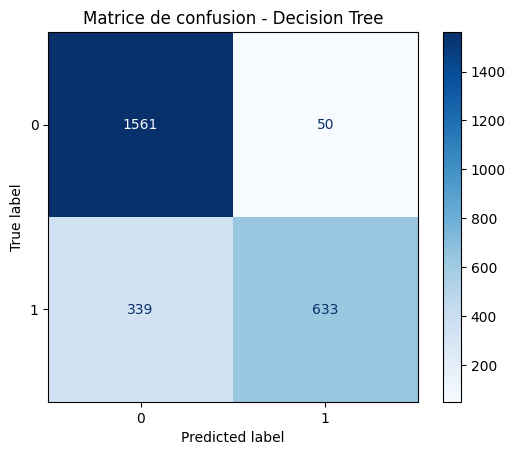

--- Random Forest ---
Train: {'accuracy': 1.0, 'f1': 1.0, 'recall': 1.0}
Validation: {'accuracy': 0.9963144963144963, 'f1': 0.9914040114613181, 'recall': 1.0}
Test: {'accuracy': 0.9578010065814944, 'f1': 0.9436109674081739, 'recall': 0.9382716049382716}

Classification report (Test):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1611
           1       0.95      0.94      0.94       972

    accuracy                           0.96      2583
   macro avg       0.96      0.95      0.95      2583
weighted avg       0.96      0.96      0.96      2583



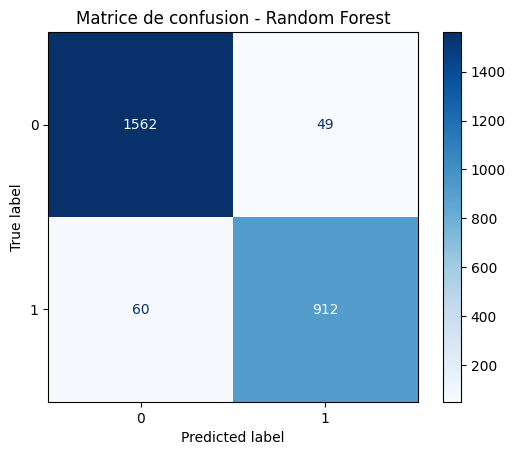

--- SVM ---
Train: {'accuracy': 0.9880257906048511, 'f1': 0.9725158562367865, 'recall': 0.9978308026030369}
Validation: {'accuracy': 0.9864864864864865, 'f1': 0.969187675070028, 'recall': 1.0}
Test: {'accuracy': 0.9779326364692218, 'f1': 0.971457185778668, 'recall': 0.9979423868312757}

Classification report (Test):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1611
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2583
   macro avg       0.97      0.98      0.98      2583
weighted avg       0.98      0.98      0.98      2583



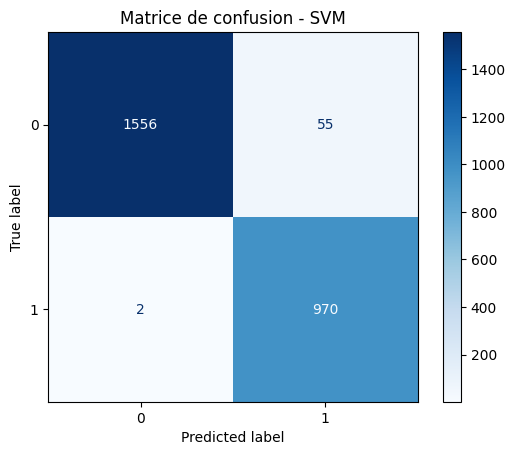

--- kNN ---
Train: {'accuracy': 0.9952410193429536, 'f1': 0.9887803112558813, 'recall': 0.987707881417209}
Validation: {'accuracy': 0.995085995085995, 'f1': 0.9885714285714285, 'recall': 1.0}
Test: {'accuracy': 0.9128919860627178, 'f1': 0.8775176918889493, 'recall': 0.8292181069958847}

Classification report (Test):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1611
           1       0.93      0.83      0.88       972

    accuracy                           0.91      2583
   macro avg       0.92      0.90      0.90      2583
weighted avg       0.91      0.91      0.91      2583



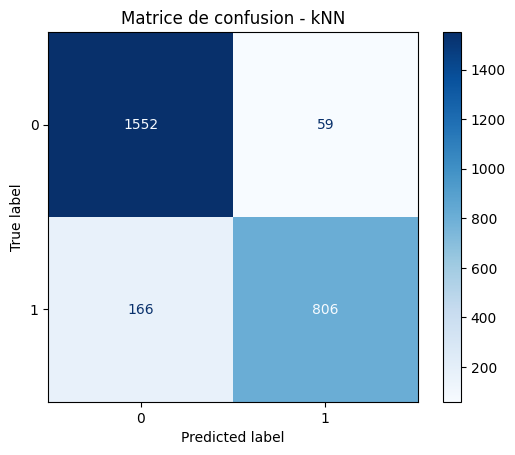

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


#  Entraîner et évaluer chaque modèle sur Test1
dt_model, dt_metrics = train_and_evaluate(dt_model, X_train, y_train, X_val, y_val, X_test1, y_test1, "Decision Tree")
rf_model, rf_metrics = train_and_evaluate(rf_model, X_train, y_train, X_val, y_val, X_test1, y_test1, "Random Forest")
svm_model, svm_metrics = train_and_evaluate(svm_model, X_train, y_train, X_val, y_val, X_test1, y_test1, "SVM")
knn_model, knn_metrics = train_and_evaluate(knn_model, X_train, y_train, X_val, y_val, X_test1, y_test1, "kNN")


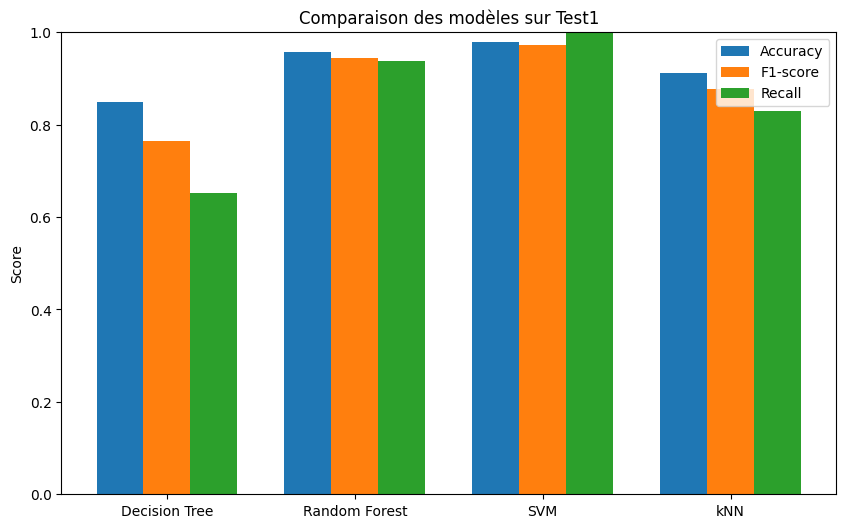

In [53]:
# Comparaison des scores sur Test1
models = ["Decision Tree", "Random Forest", "SVM", "kNN"]
accuracy = [dt_metrics['test']['accuracy'], rf_metrics['test']['accuracy'],
            svm_metrics['test']['accuracy'], knn_metrics['test']['accuracy']]
f1 = [dt_metrics['test']['f1'], rf_metrics['test']['f1'],
      svm_metrics['test']['f1'], knn_metrics['test']['f1']]
recall = [dt_metrics['test']['recall'], rf_metrics['test']['recall'],
          svm_metrics['test']['recall'], knn_metrics['test']['recall']]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, f1, width, label='F1-score')
plt.bar(x + width, recall, width, label='Recall')
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Comparaison des modèles sur Test1")
plt.ylim(0,1)
plt.legend()
plt.show()


--- Évaluation sur Test2 ---

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7217
           1       0.97      0.70      0.81      2047

    accuracy                           0.93      9264
   macro avg       0.95      0.85      0.88      9264
weighted avg       0.93      0.93      0.92      9264



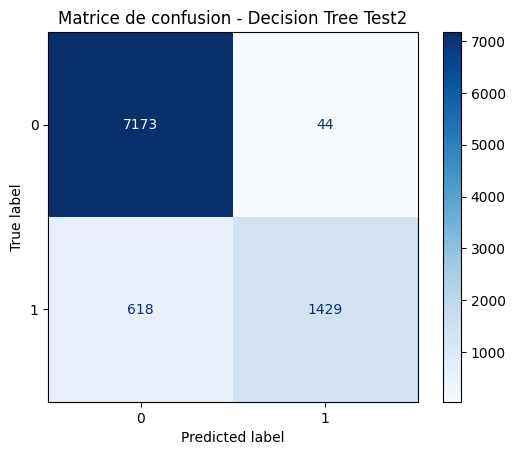

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7217
           1       0.90      0.97      0.94      2047

    accuracy                           0.97      9264
   macro avg       0.95      0.97      0.96      9264
weighted avg       0.97      0.97      0.97      9264



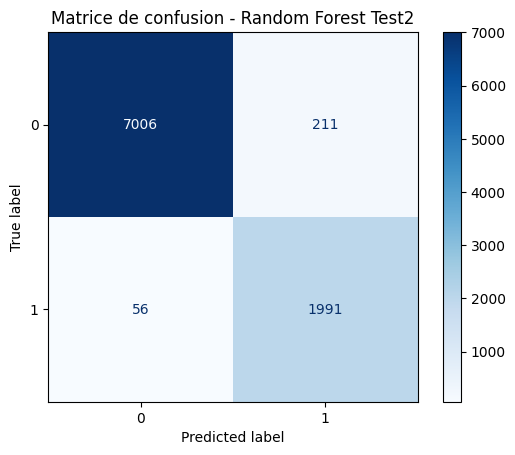

--- SVM ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7217
           1       0.97      0.99      0.98      2047

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



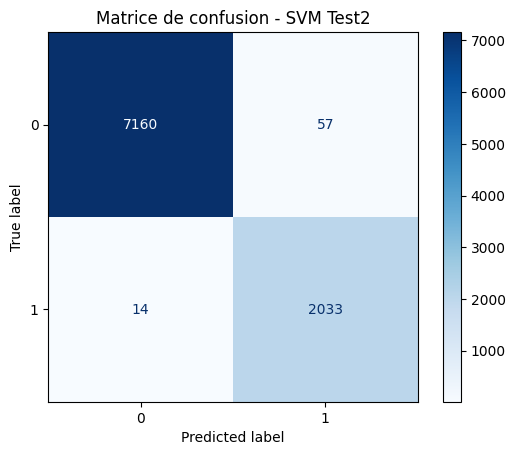

--- kNN ---
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7217
           1       0.86      0.86      0.86      2047

    accuracy                           0.94      9264
   macro avg       0.91      0.91      0.91      9264
weighted avg       0.94      0.94      0.94      9264



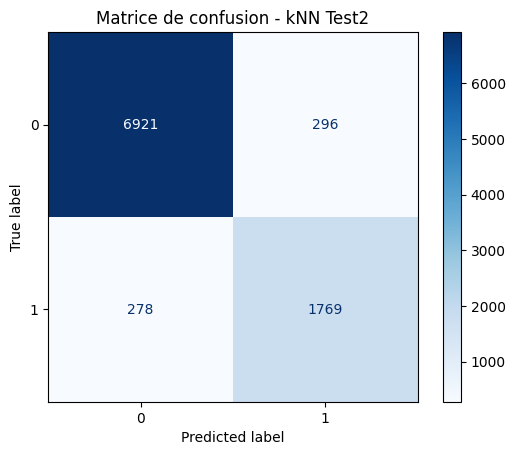

In [55]:

#  Évaluation sur le deuxième fichier Test2
print("\n--- Évaluation sur Test2 ---\n")
for model, name in zip([dt_model, rf_model, svm_model, knn_model],
                       ["Decision Tree", "Random Forest", "SVM", "kNN"]):
    y_pred2 = model.predict(X_test2)
    print(f"--- {name} ---")
    print(classification_report(y_test2, y_pred2))
    ConfusionMatrixDisplay.from_estimator(model, X_test2, y_test2, cmap=plt.cm.Blues)
    plt.title(f"Matrice de confusion - {name} Test2")
    plt.show()

In [57]:
#Sauvegarde des modèles si besoin
joblib.dump(dt_model, "dt_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(knn_model, "knn_model.pkl")

['knn_model.pkl']

In [58]:
import os
print(os.listdir())  # liste tous les fichiers du dossier courant


['.config', 'dt_model.pkl', 'datatest2.txt', 'datatest.txt', 'svm_model.pkl', 'rf_model.pkl', 'knn_model.pkl', 'datatraining.txt', 'drive', 'sample_data']


In [ ]:
#pour les recharger et les utiliser

import joblib

dt_model = joblib.load("dt_model.pkl")
rf_model = joblib.load("rf_model.pkl")
svm_model = joblib.load("svm_model.pkl")
knn_model = joblib.load("knn_model.pkl")
